C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          meter_reading   No. Observations:                 8776
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -21932.679
Date:                Tue, 29 Oct 2024   AIC                          43871.358
Time:                        16:01:35   BIC                          43892.597
Sample:                             0   HQIC                         43878.594
                               - 8776                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7197      0.139     -5.186      0.000      -0.992      -0.448
ma.L1          0.7423      0.134      5.536      0.000       0.479       1.005
sigma2         8.6797      0.109     79.490      0.0

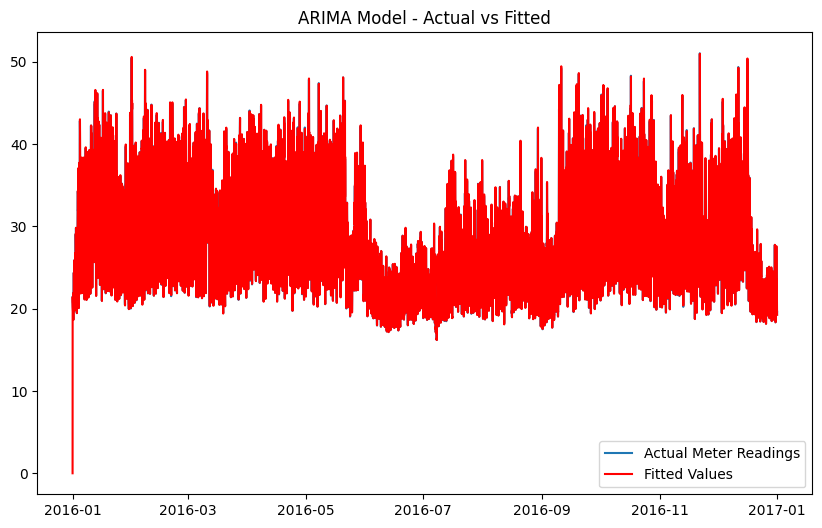

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path accordingly)
df = pd.read_csv(r"C:\Users\Admin\Electricity Bill ML Project\building_779_updated_meter_reading.csv")

# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' as the index
df.set_index('timestamp', inplace=True)

# Sort by index to ensure proper time order
df = df.sort_index()

# Optionally filter for building_id 779 if needed
# df = df[df['building_id'] == 779]

# Fit ARIMA model on the 'meter_reading' column
# Adjust p, d, q parameters as necessary. Start with (p=1, d=1, q=1) and tune
model = ARIMA(df['meter_reading'], order=(1, 1, 1))
arima_model = model.fit()

# Summary of the ARIMA model
print(arima_model.summary())

# Plot the fitted values against the actual meter readings
plt.figure(figsize=(10, 6))
plt.plot(df['meter_reading'], label='Actual Meter Readings')
plt.plot(arima_model.fittedvalues, color='red', label='Fitted Values')
plt.title('ARIMA Model - Actual vs Fitted')
plt.legend()
plt.show()


In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset (adjust the file path accordingly)
df = pd.read_csv(r"C:\Users\Admin\Electricity Bill ML Project\building_779_updated_meter_reading.csv")

# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set 'timestamp' as the index
df.set_index('timestamp', inplace=True)

# Sort by index to ensure proper time order
df = df.sort_index()

# Split the dataset into training and testing sets (80-20 split)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model on the training data
model = ARIMA(train['meter_reading'], order=(1, 1, 1))
arima_model = model.fit()

# Summary of the ARIMA model
print(arima_model.summary())



C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          meter_reading   No. Observations:                 7020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17541.814
Date:                Tue, 29 Oct 2024   AIC                          35089.628
Time:                        16:01:39   BIC                          35110.197
Sample:                             0   HQIC                         35096.715
                               - 7020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7741      0.121     -6.375      0.000      -1.012      -0.536
ma.L1          0.7962      0.116      6.847      0.000       0.568       1.024
sigma2         8.6756      0.123     70.527      0.0

In [3]:
# Forecast on the test set
test_predictions = arima_model.forecast(steps=len(test))

# Calculate error metrics
mae = mean_absolute_error(test['meter_reading'], test_predictions)
mse = mean_squared_error(test['meter_reading'], test_predictions)
rmse = np.sqrt(mse)

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 5.864785892436199
Mean Squared Error (MSE): 48.00604197804437
Root Mean Squared Error (RMSE): 6.928639258761014


C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


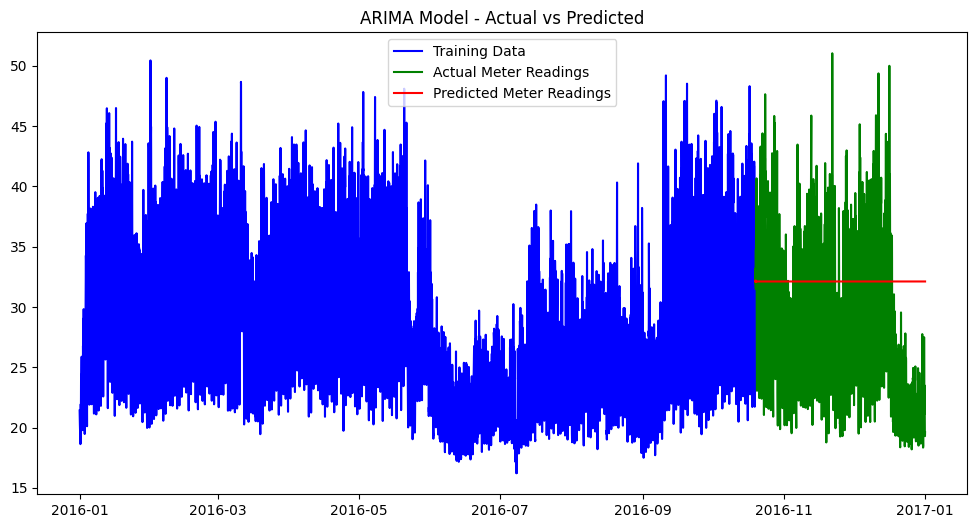

In [4]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train['meter_reading'], label='Training Data', color='blue')
plt.plot(test['meter_reading'], label='Actual Meter Readings', color='green')
plt.plot(test.index, test_predictions, label='Predicted Meter Readings', color='red')
plt.title('ARIMA Model - Actual vs Predicted')
plt.legend()
plt.show()

In [5]:
# Calculate MAPE
mape = np.mean(np.abs((test['meter_reading'] - test_predictions) / test['meter_reading'])) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): nan%


C:\Users\Admin\AppData\Local\Temp\ipykernel_17696\2987607595.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test['meter_reading'] - test_predictions) / test['meter_reading'])) * 100


Random Forest MAE: 5.52598270397666
Random Forest MSE: 42.67740193344401
Random Forest RMSE: 6.532794343421811
Random Forest MAPE: 20.82%


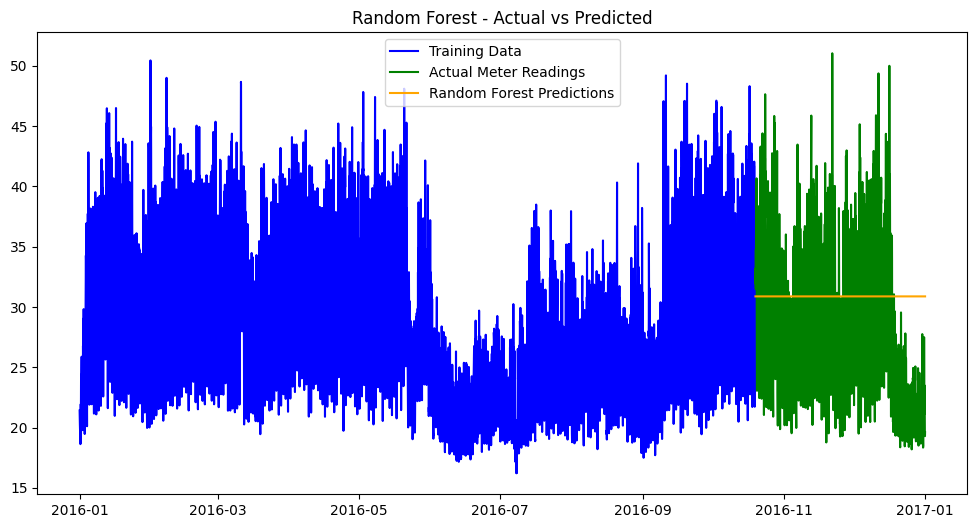

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest model on the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train.index.values.reshape(-1, 1), train['meter_reading'])

# Predict on the test set
rf_predictions = rf_model.predict(test.index.values.reshape(-1, 1))

# Calculate error metrics for Random Forest
rf_mae = mean_absolute_error(test['meter_reading'], rf_predictions)
rf_mse = mean_squared_error(test['meter_reading'], rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mape = np.mean(np.abs((test['meter_reading'] - rf_predictions) / test['meter_reading'])) * 100

# Print Random Forest results
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAPE: {rf_mape:.2f}%")

# Plot Random Forest predictions
plt.figure(figsize=(12, 6))
plt.plot(train['meter_reading'], label='Training Data', color='blue')
plt.plot(test['meter_reading'], label='Actual Meter Readings', color='green')
plt.plot(test.index, rf_predictions, label='Random Forest Predictions', color='orange')
plt.title('Random Forest - Actual vs Predicted')
plt.legend()
plt.show()


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0415
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0085
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0073
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0072
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0068
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0068
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0066
Epoch 10/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0069
Epoch 11/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066
Epoch 12/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066
Epoch 13/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066
Epoch 14/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068
Epoch 15/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0065
Epoch 81/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063
Epoch 82/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0068
Epoch 83/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066
Epoch 84/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062
Epoch 85/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0063
Epoch 86/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063
Epoch 87/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063
Epoch 88/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063
Epoch 89/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064
Epoch 90/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064
Epoch 91/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0061
Epoch 92/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0062
Epoch 93/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0063
Epoch 94/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

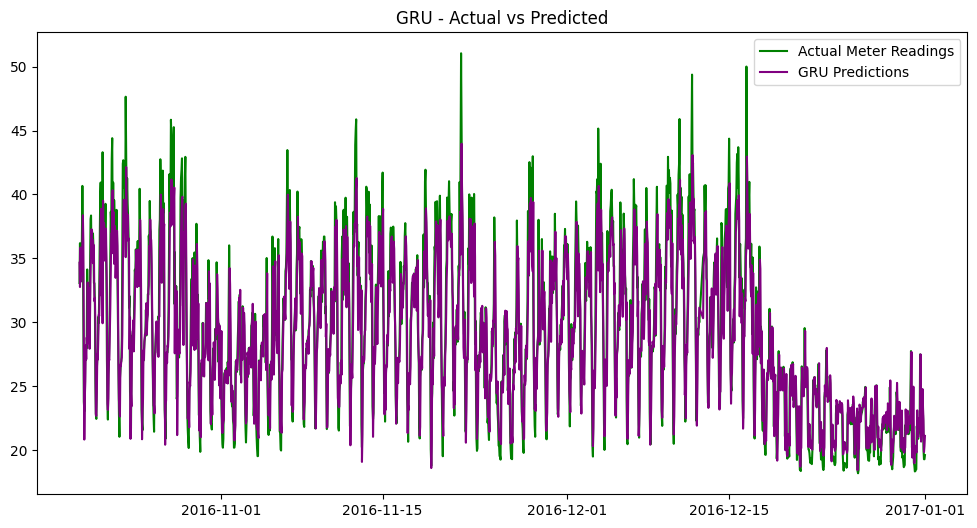

In [7]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale the data for GRU
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train['meter_reading'].values.reshape(-1, 1))
test_scaled = scaler.transform(test['meter_reading'].values.reshape(-1, 1))

# Prepare data for GRU model
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 5
X_train, y_train = create_dataset(train_scaled, time_steps)
X_test, y_test = create_dataset(test_scaled, time_steps)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build GRU model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(time_steps, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

# Train the GRU model
gru_model.fit(X_train, y_train, epochs=100, batch_size=64)

# Predict with GRU
gru_predictions = gru_model.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

# Calculate error metrics for GRU
gru_mae = mean_absolute_error(test['meter_reading'].iloc[time_steps:], gru_predictions)
gru_mse = mean_squared_error(test['meter_reading'].iloc[time_steps:], gru_predictions)
gru_rmse = np.sqrt(gru_mse)
gru_predictions = gru_predictions.flatten()  # Flatten the 2D array to 1D

# Calculate MAPE
gru_mape = np.mean(np.abs((test['meter_reading'].iloc[time_steps:] - gru_predictions) / test['meter_reading'].iloc[time_steps:])) * 100


# Print GRU results
print(f"GRU MAE: {gru_mae}")
print(f"GRU MSE: {gru_mse}")
print(f"GRU RMSE: {gru_rmse}")
print(f"GRU MAPE: {gru_mape:.2f}%")

# Plot GRU predictions
plt.figure(figsize=(12, 6))
plt.plot(test['meter_reading'].iloc[time_steps:], label='Actual Meter Readings', color='green')
plt.plot(test.index[time_steps:], gru_predictions, label='GRU Predictions', color='purple')
plt.title('GRU - Actual vs Predicted')
plt.legend()
plt.show()


Epoch 1/100


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0807
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0119
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0091
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0087
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0077
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0073
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0070
Epoch 10/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0072
Epoch 11/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0068
Epoch 12/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0065
Epoch 13/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0068
Epoch 14/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0067
Epoch 15/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063
Epoch 81/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065
Epoch 82/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066
Epoch 83/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066
Epoch 84/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0064
Epoch 85/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063
Epoch 86/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0062
Epoch 87/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0064
Epoch 88/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063
Epoch 89/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066
Epoch 90/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0062
Epoch 91/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063
Epoch 92/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063
Epoch 93/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063
Epoch 94/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5m

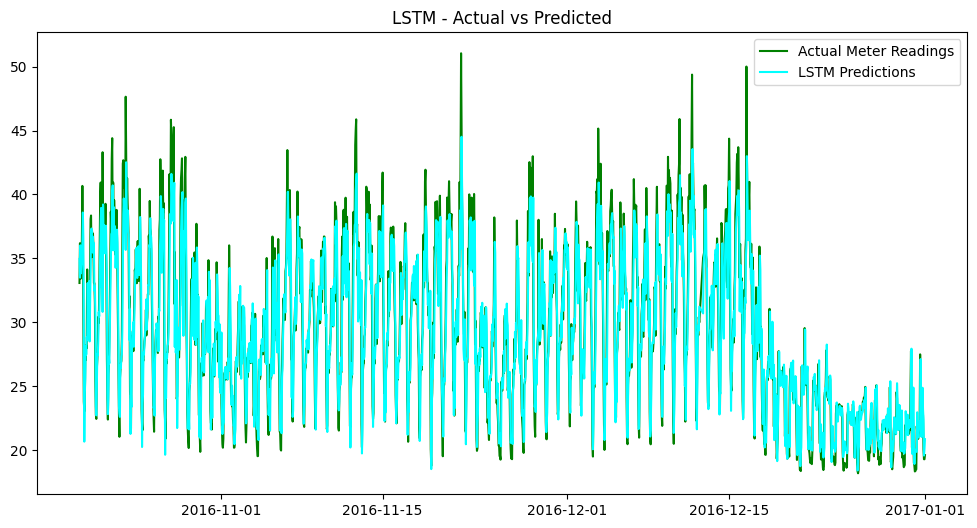

In [8]:
from keras.layers import LSTM

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=64)

# Predict with LSTM
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Calculate error metrics for LSTM
lstm_mae = mean_absolute_error(test['meter_reading'].iloc[time_steps:], lstm_predictions)
lstm_mse = mean_squared_error(test['meter_reading'].iloc[time_steps:], lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
# Flatten the LSTM predictions if they are 2D
lstm_predictions = lstm_predictions.flatten()

# Now calculate the MAPE
lstm_mape = np.mean(np.abs((test['meter_reading'].iloc[time_steps:] - lstm_predictions) / test['meter_reading'].iloc[time_steps:])) * 100


# Print LSTM results
print(f"LSTM MAE: {lstm_mae}")
print(f"LSTM MSE: {lstm_mse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM MAPE: {lstm_mape:.2f}%")

# Plot LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(test['meter_reading'].iloc[time_steps:], label='Actual Meter Readings', color='green')
plt.plot(test.index[time_steps:], lstm_predictions, label='LSTM Predictions', color='cyan')
plt.title('LSTM - Actual vs Predicted')
plt.legend()
plt.show()


In [9]:
# Print LSTM results
print(f"LSTM MAE: {lstm_mae}")
print(f"LSTM MSE: {lstm_mse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"LSTM MAPE: {lstm_mape:.2f}%")

LSTM MAE: 2.051206153640632
LSTM MSE: 7.471162548604464
LSTM RMSE: 2.7333427426147026
LSTM MAPE: 6.92%


# Anomaly Detection

In [10]:
# Calculate residuals (actual - predicted) for each model
residuals_rf = test['meter_reading'] - rf_predictions
residuals_gru = test['meter_reading'].iloc[time_steps:] - gru_predictions
residuals_lstm = test['meter_reading'].iloc[time_steps:] - lstm_predictions


In [11]:
# Calculate the threshold using standard deviation (you can adjust the multiplier)
threshold_rf = residuals_rf.std() * 3  # 3 standard deviations away
threshold_gru = residuals_gru.std() * 3
threshold_lstm = residuals_lstm.std() * 5

# Flag anomalies based on the threshold
anomalies_rf = np.abs(residuals_rf) > threshold_rf
anomalies_gru = np.abs(residuals_gru) > threshold_gru
anomalies_lstm = np.abs(residuals_lstm) > threshold_lstm


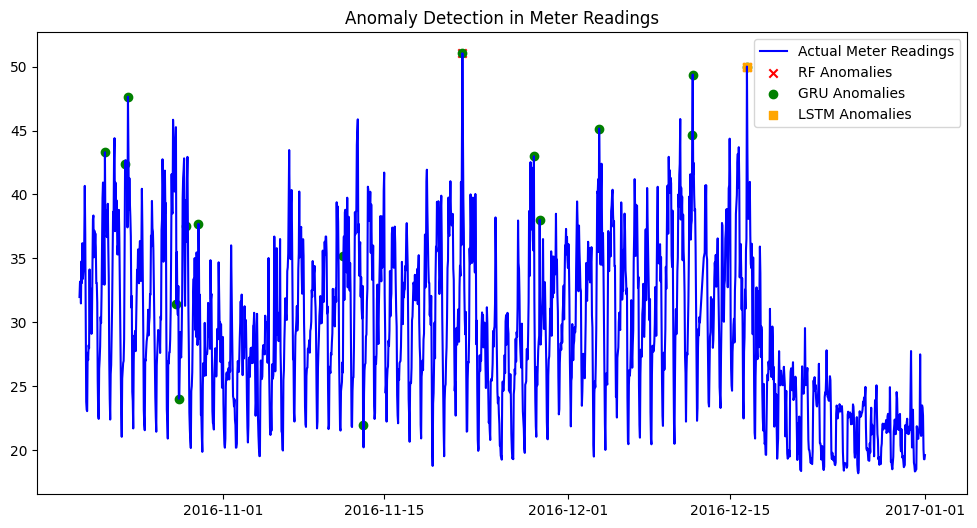

In [12]:
# Adjust the index to align with GRU and LSTM predictions
adjusted_test_index_gru = test.index[time_steps:]
adjusted_test_index_lstm = test.index[time_steps:]

# Plot actual meter readings
plt.figure(figsize=(12, 6))
plt.plot(test['meter_reading'], label='Actual Meter Readings', color='blue')

# Plot anomalies for each model
plt.scatter(test.index[anomalies_rf], test['meter_reading'][anomalies_rf], color='red', label='RF Anomalies', marker='x')
plt.scatter(adjusted_test_index_gru[anomalies_gru], test['meter_reading'].iloc[time_steps:][anomalies_gru], color='green', label='GRU Anomalies', marker='o')
plt.scatter(adjusted_test_index_lstm[anomalies_lstm], test['meter_reading'].iloc[time_steps:][anomalies_lstm], color='orange', label='LSTM Anomalies', marker='s')

plt.title('Anomaly Detection in Meter Readings')
plt.legend()
plt.show()


NameError: name 'anomalies_gru_iso' is not defined

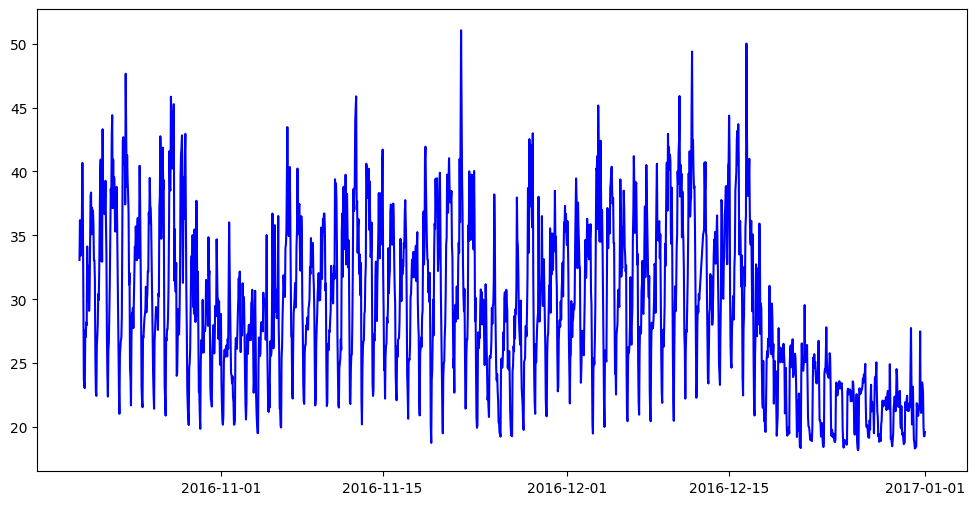

In [13]:
# Adjust the test index to match the length of the GRU predictions (after time_steps)
adjusted_test_index_gru_iso = test.index[time_steps:]

# Plot actual meter readings after time_steps
plt.figure(figsize=(12, 6))
plt.plot(test['meter_reading'].iloc[time_steps:], label='Actual Meter Readings', color='blue')

# Plot anomalies detected by the Isolation Forest
plt.scatter(adjusted_test_index_gru_iso[anomalies_gru_iso], 
            test['meter_reading'].iloc[time_steps:][anomalies_gru_iso], 
            color='red', label='Isolation Forest Anomalies', marker='x')

plt.title('GRU Anomalies Detected by Isolation Forest')
plt.legend()
plt.show()


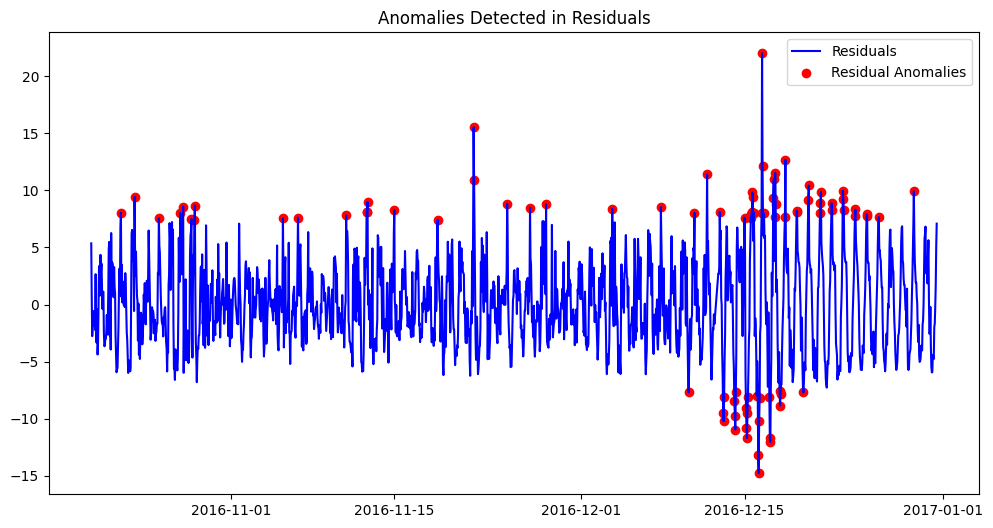

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(test['meter_reading'], model='additive', period=24)  # Assuming daily data

# Residuals contain anomalies
residuals = decomposition.resid.dropna()

# Define a threshold for residual anomalies
residual_threshold = np.percentile(np.abs(residuals), 95)
residual_anomalies = np.abs(residuals) > residual_threshold

# Plot the residuals and anomalies
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.scatter(residuals.index[residual_anomalies], residuals[residual_anomalies], color='red', label='Residual Anomalies', marker='o')
plt.title('Anomalies Detected in Residuals')
plt.legend()
plt.show()
